In [6]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [69]:
# movie data
movie_dataframe = pd.read_csv("imdb_top_1000.csv")

#5 row sample
movie_dataframe.head(5)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [ ]:
number_of_movies = movie_dataframe.shape[0]
print(number_of_movies)

1000

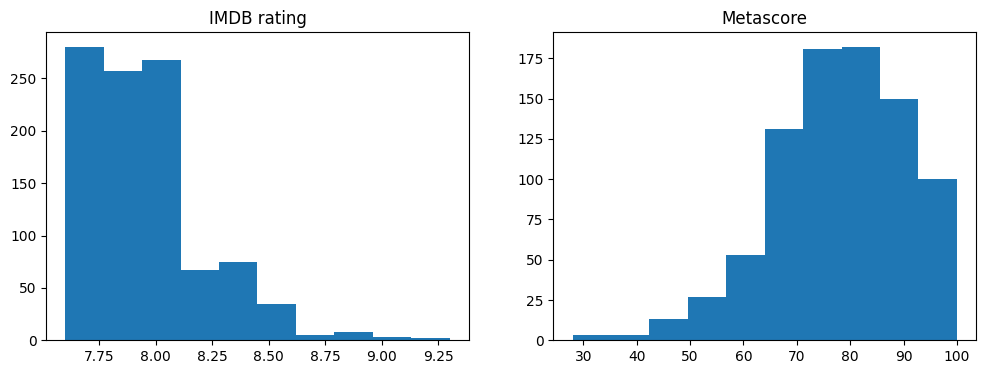

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

rating_distribution = axs[0].hist(movie_dataframe["IMDB_Rating"])
axs[0].set_title("IMDB rating")
# high ratings expected as the dataset is top 1000
rating_distribution = axs[1].hist(movie_dataframe["Meta_score"])
axs[1].set_title("Metascore")
plt.show()


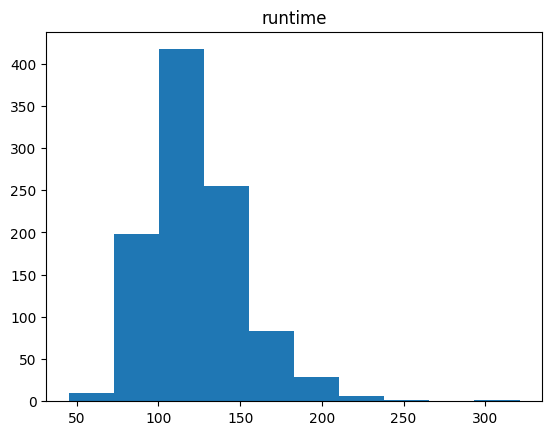

In [ ]:
#movie_dataframe["Runtime"]

runtime_int = [int(runtime.split()[0]) for runtime in movie_dataframe["Runtime"]]
plt.hist(runtime_int)
plt.title("runtime")
plt.show()

In [49]:
str(movie_dataframe["Gross"][18])

'nan'

[28341469, 134966411, 534858444, 57300000, 4360000, 377845905, 107928762, 96898818, 292576195, 37030102, 315544750, 330252182, 6100000, 342551365, 171479930, 46836394, 290475067, 112000000, 53367844, 188020017, 7563397, 10055859, 216540909, 136801374, 57598247, 100125643, 130742922, 322740140, 269061, 335451311, 13092000, 13182281, 53089891, 132384315, 32572577, 187705427, 6719864, 23341568, 19501238, 422783777, 204843350, 11990401, 210609762, 5321508, 32000000, 1024560, 163245, 19181, 1661096, 5017246, 12391761, 190241310, 858373000, 678815482, 209726015, 162805434, 448139099, 6532908, 1223869, 223808164, 11286112, 707481, 25544867, 2375308, 5321508, 248159971, 44017374, 83471511, 78900000, 275902, 8175000, 36764313, 288475, 159227644, 1373943, 687185, 7098492, 6857096, 120540719, 34400301, 33225499, 30328156, 3635482, 130096601, 138433435, 933933, 191796233, 75600000, 2832029, 46357676, 85160248, 51973029, 45598982, 309125409, 11487676, 28262574, 159600000, 6207725, 56954992, 1500000

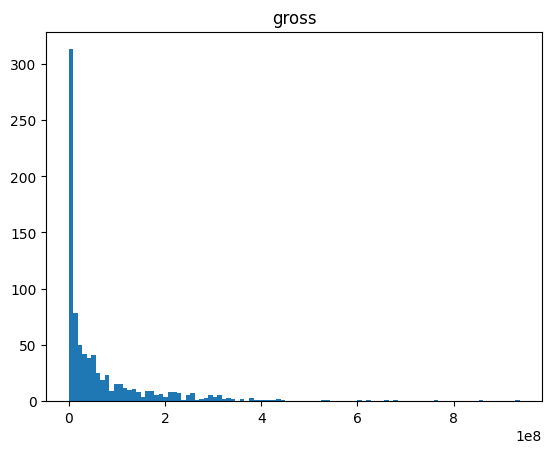

In [ ]:
movie_dataframe["Gross"][0]
# removes NaN box office, resulting list of 831 (might be NAN for all newer still running movies and those not aired in US but need to look into it more)
gross_int = [int(str(gross).replace(",", "")) for gross in movie_dataframe["Gross"] if not str(gross) == "nan"]
print(gross_int)
plt.hist(gross_int, bins=100)
plt.title("gross")
plt.show()




Trends over time

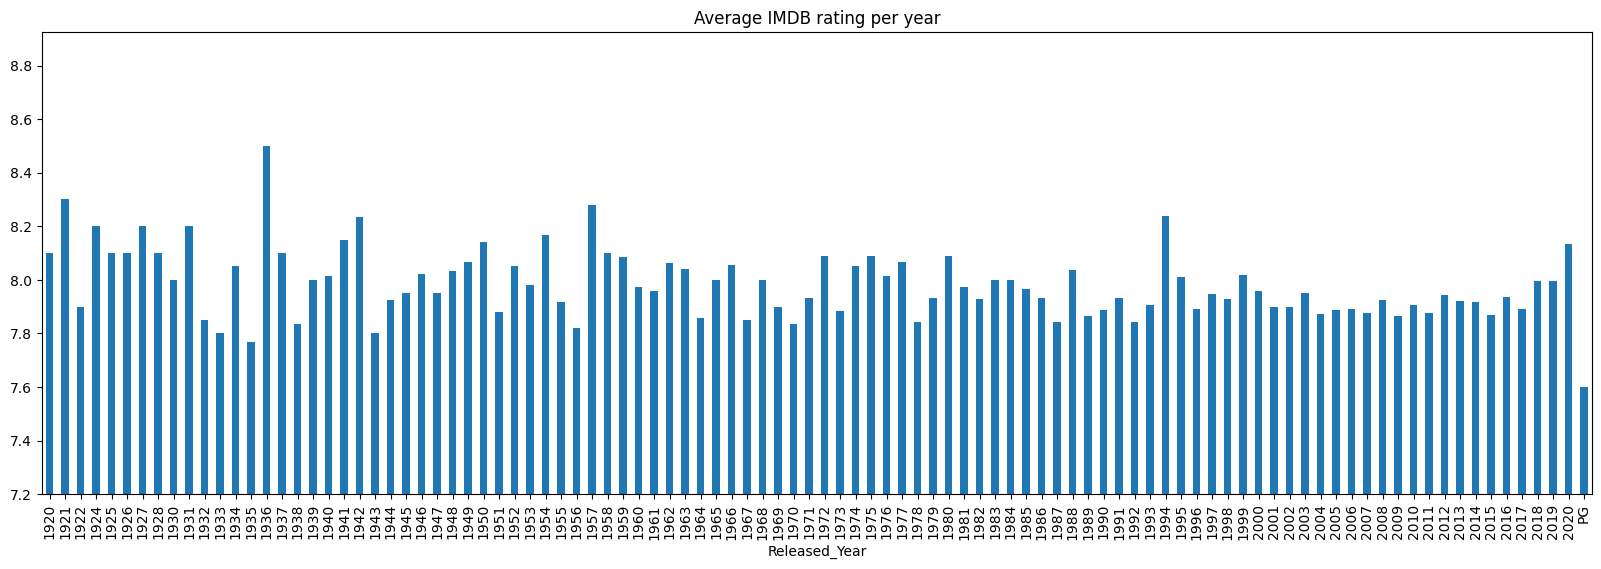

In [85]:
rating_per_year = movie_dataframe.groupby("Released_Year")["IMDB_Rating"].mean()
#print(rating_per_year)

rating_per_year.plot(kind="bar", figsize=(20, 6))
plt.ylim(bottom=7.2)
plt.title("Average IMDB rating per year")
plt.show()

In [121]:
# improved df for for future use as the original Gross is unpredictable because nan vales are float and others string
movie_dataframe["Gross_String"] = movie_dataframe["Gross"].astype(str)
movie_dataframe["Gross_Float"] = movie_dataframe["Gross_String"].str.replace(",", "").astype(float)
movie_dataframe.head(20)


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Gross_String,Gross_Int,Runtime_Int,Gross_Float
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469","28,341,469",28341469.0,142,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411","134,966,411",134966411.0,175,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444","534,858,444",534858444.0,152,534858444.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000","57,300,000",57300000.0,202,57300000.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000","4,360,000",4360000.0,96,4360000.0
5,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905","377,845,905",377845905.0,201,377845905.0
6,https://m.media-amazon.com/images/M/MV5BNGNhMD...,Pulp Fiction,1994,A,154 min,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",94.0,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,"107,928,762","107,928,762",107928762.0,154,107928762.0
7,https://m.media-amazon.com/images/M/MV5BNDE4OT...,Schindler's List,1993,A,195 min,"Biography, Drama, History",8.9,"In German-occupied Poland during World War II,...",94.0,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,"96,898,818","96,898,818",96898818.0,195,96898818.0
8,https://m.media-amazon.com/images/M/MV5BMjAxMz...,Inception,2010,UA,148 min,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,"292,576,195","292,576,195",292576195.0,148,292576195.0
9,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Fight Club,1999,A,139 min,Drama,8.8,An insomniac office worker and a devil-may-car...,66.0,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,"37,030,102","37,030,102",37030102.0,139,37030102.0


In [118]:
# also extract runtime as int
movie_dataframe["Runtime_Int"] = movie_dataframe["Runtime"].str.extract("(\d+)").astype(int)
movie_dataframe.head()

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\eetu\AppData\Local\Temp\ipykernel_7024\1279643754.py:2: SyntaxWarning: invalid escape sequence '\d'
  movie_dataframe["Runtime_Int"] = movie_dataframe["Runtime"].str.extract("(\d+)").astype(int)


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Gross_String,Gross_Int,Runtime_Int
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469","28,341,469",28341469,142
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411","134,966,411",134966411,175
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444","534,858,444",534858444,152
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000","57,300,000",57300000,202
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000","4,360,000",4360000,96


In [125]:
# saving improved dataframe for use in future tasks
movie_dataframe.to_csv("imdb_top_1000_improved.csv")

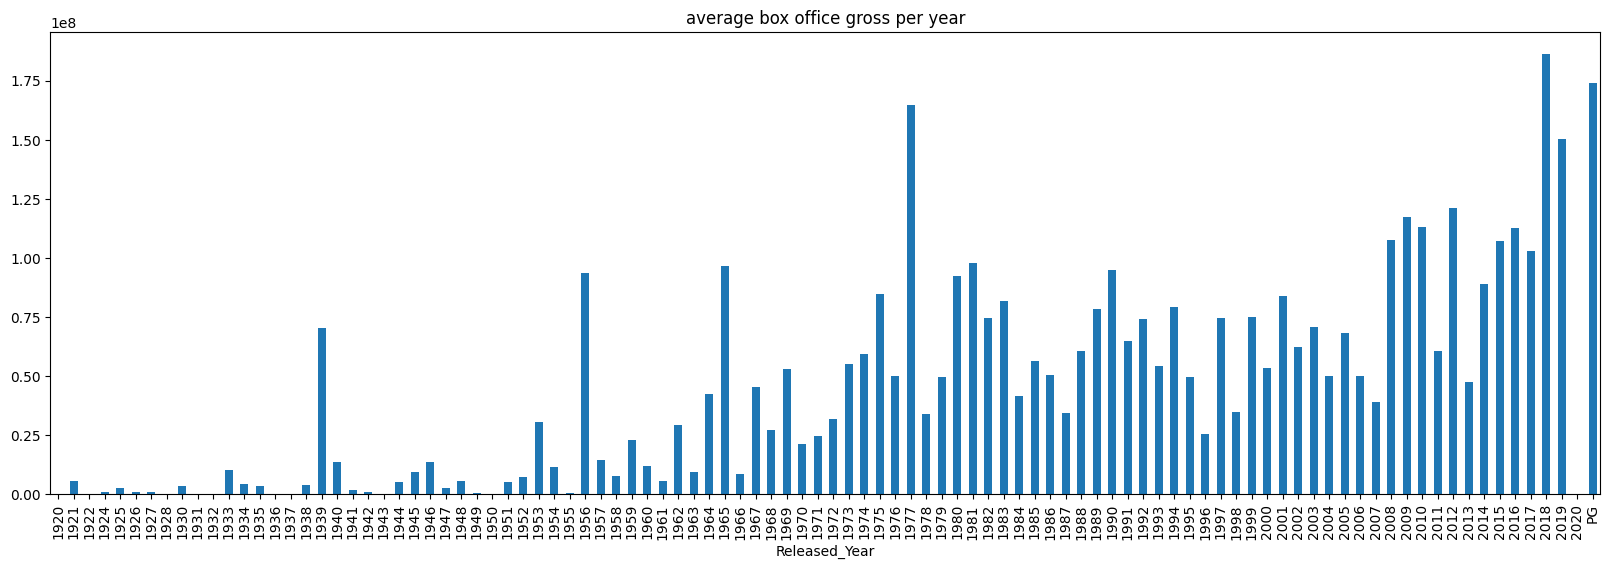

In [133]:
avg_gross_per_year = movie_dataframe.groupby("Released_Year")["Gross_Float"].mean()
#print(avg_gross_per_year)
avg_gross_per_year.plot(kind="bar", figsize=(20, 6))
plt.title("average box office gross per year")
plt.show()

#type(movie_dataframe["Gross_Float"][0])

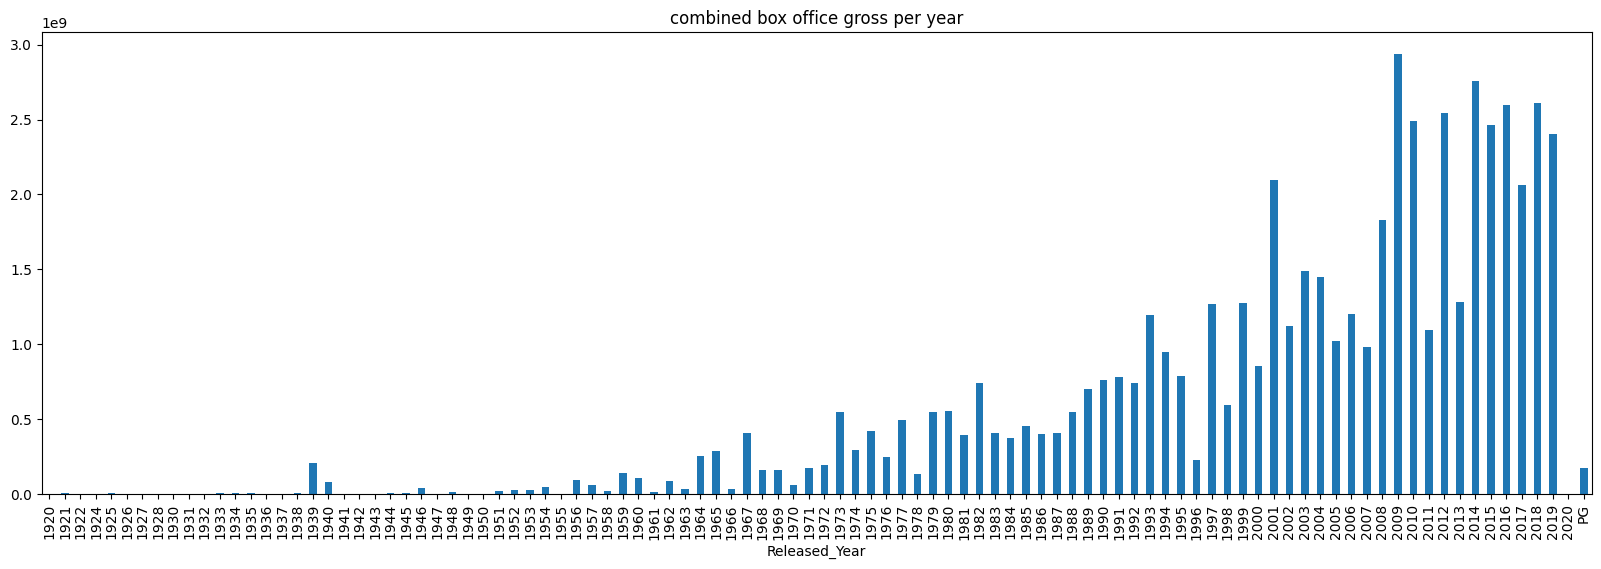

In [134]:
gross_per_year = movie_dataframe.groupby("Released_Year")["Gross_Float"].sum()
#print(gross_per_year)
gross_per_year.plot(kind="bar", figsize=(20, 6))
plt.title("combined box office gross per year")
plt.show()
